In [1]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

plt.rcParams.update({'font.size': 45})

def f(x):
    x1, x2 = x
    return 0.02*x1*x1 + 0.005*x2*x2

def L2(x):
    x1, x2 = x
    return math.sqrt(x1*x1 + x2*x2)

def grad1(x1):
    return 0.04*x1

def grad2(x2):
    return 0.01*x2

def grad(x):
    x1, x2 = x
    grad = np.array([0.04*x1, 0.01*x2])
    return grad

def hessian(x):
    hessian = np.array([[0.04, 0], [0, 0.01]])
    return hessian

In [2]:
time = int(300)
dpi=100
mu = 0.001
sqmu= math.sqrt(mu)
s = (1-math.exp(-sqmu))*(1-math.exp(-sqmu))/mu
a = (1-math.exp(-sqmu))/(2-math.exp(-sqmu))
b = math.exp(-sqmu)/(2-math.exp(-sqmu))
time2 = int(time/sqmu)

p0 = [1,1,0,0]

t = np.linspace(0, time, time+1)

t2 = np.linspace(0, time, time*1000+1)

In [3]:
def ODE_SC(p,t):
    x1, x2, dx1, dx2 = p
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1+a*dx1/sqmu) , -(2-a)*sqmu*dx2-grad2(x2+a*dx2/sqmu)]
    return dpdt

def ODE_SC2(p,t):
    x1, x2, dx1, dx2 = p
    a=1
    dpdt = [dx1, dx2, -(2-a)*sqmu*dx1-grad1(x1+a*dx1/sqmu) , -(2-a)*sqmu*dx2-grad2(x2+a*dx2/sqmu)]
    return dpdt

In [4]:
sol = odeint(ODE_SC, p0, t2)
sol2 = odeint(ODE_SC2, p0, t2)

In [5]:
sol_func = np.apply_along_axis(f, 1,  sol[:,:2])
sol2_func = np.apply_along_axis(f, 1,  sol2[:,:2])

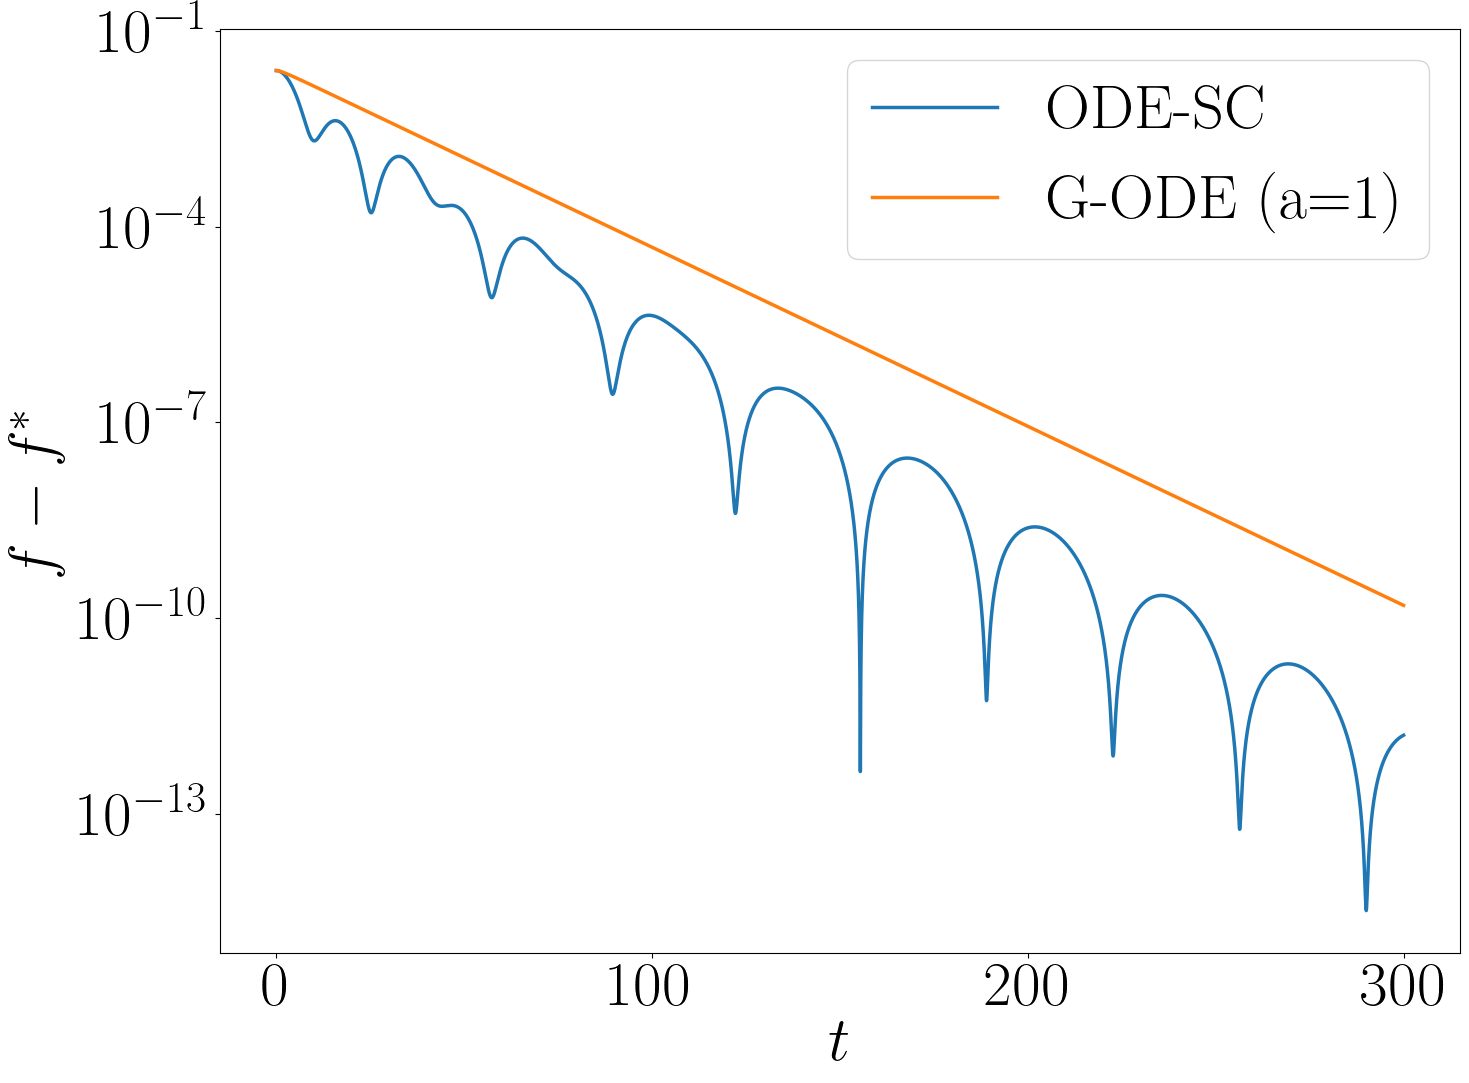

In [6]:
plt.figure(figsize=(16,12))
plt.plot(t2, sol_func, label='ODE-SC', linewidth=2.5)
plt.plot(t2, sol2_func, label='G-ODE (a=1)', linewidth=2.5)
plt.xlabel('$t$', labelpad=0)
plt.ylabel('$f-f^*$', labelpad=10)
plt.yscale('log')
plt.legend()
plt.savefig('time1.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [7]:
def GD(time=time2):
    gd = np.zeros((time+1,2))
    gd[0] = [1, 1]
    for k in range(time):
        gd[k+1] = gd[k] -  grad(gd[k])
    return gd
gd = GD()

In [8]:
def GDM(time=time2):
    gdm = np.zeros((time+1,2))
    gdm[0] = [1, 1]
    for k in range(time):
        gdm[k+1] = (gd[k+1]+gdm[k]/mu)/(1+1/mu)
    return gdm
gdm = GDM()

In [9]:
t3 = np.linspace(0, time2, time2+1)

t4 = sqmu*t3

gdm_func = np.apply_along_axis(f, 1, gdm)

sol2_gdm = np.zeros_like(gdm)

sol2_gdm[:,0] = np.interp(t4, t2, sol2[:, 0])

sol2_gdm[:,1] = np.interp(t4, t2, sol2[:, 1])

L2_sol2_gdm = np.apply_along_axis(L2, 1, sol2_gdm-gdm)

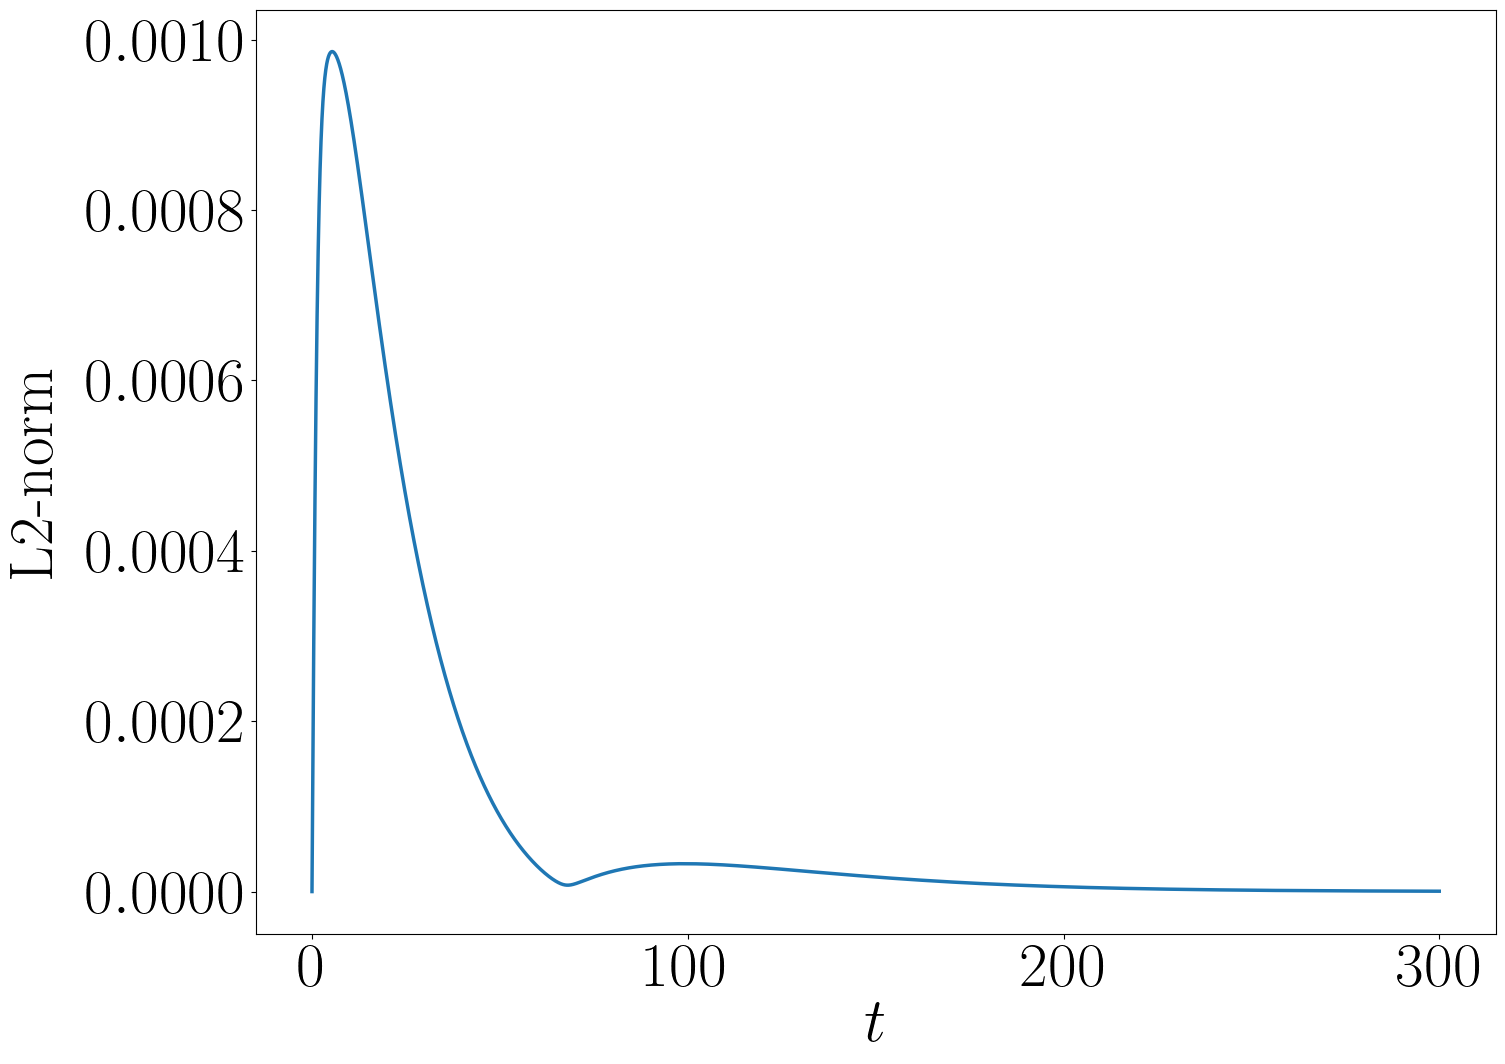

In [10]:
plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(t4, L2_sol2_gdm, linewidth=2.5)
plt.xlabel('$t$', labelpad=0)
plt.ylabel('L2-norm', labelpad=15)
plt.savefig('time2.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()